### Exploratory Data Anaysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [56]:
df=pd.read_csv("C:/Users/HP/Desktop/data sets/supermarket_sales_1.csv")

In [57]:
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,05-01-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,08-03-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,27-01-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,08-02-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [58]:
df.shape

(1000, 17)

In [59]:
df.describe()

,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,993.000000
mean,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.966163
std,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.719300
min,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,6.900000
75%,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   city code                1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product code             1000 non-null   object 
 6   Unit price               996 non-null    object 
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [61]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

In [62]:
# filling null values with mean
mean_Rating=df['Rating'].mean()
mean_Rating
df['Rating'].fillna(value=mean_Rating, inplace=True)

In [63]:
df['Unit price'] = df['Unit price'].replace(np.nan, 0)

In [64]:
# sanity check
df.isnull().sum().sum()

0

In [100]:
data =df.drop(["Invoice ID"], axis =1)
data.head()

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [101]:
# from 1st five observation, we see that Tax 5% and gross income have same values
data['Tax 5%'].equals(data["gross income"])

True

In [102]:
# working on the date column, date is an object and we are gonna extract month value and day value from the date
print(" Begining date : ",data["Date"].min())
print(" Ending date : ",data["Date"].max())

 Begining date :  2019-01-01 00:00:00
 Ending date :  2019-12-03 00:00:00


In [103]:
data["Date"] = pd.DatetimeIndex(data["Date"])

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   city code                1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product code             1000 non-null   object        
 5   Unit price               1000 non-null   object        
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   object        
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [105]:
data["Date"][0].month

5

In [106]:
len(data["Date"])

1000

In [107]:
list_month = []
for i in range(len(data["Date"])):
    m=data['Date'][i].month
    list_month.append(m)

In [108]:
len(list_month)

1000

In [109]:
data["Month"]= list_month

In [110]:
# extracting the days fro the date
data["Date"][0].weekday()

2

In [111]:
# creating the function to apply to the entire column

def date_to_weekday(date):
    return date.weekday()

In [112]:
data["Day"] = data["Date"].apply(date_to_weekday)
data.head()

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,2
1,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6,8,5
2,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6
3,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6
4,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,4


In [114]:
# profit is equal to [ Total * Quantity - COGS ]
data["Profit"]= data["Total"] * data["Quantity"] - data["cogs"]
data.head()

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Profit
0,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,2,3319.9705
1,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6,8,5,324.7000
2,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6,2059.3685
3,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6,3446.6240
4,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,4,3836.4795


In [118]:
data.drop(["Date","cogs","Tax 5%","gross margin percentage"], axis =1)

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Total,Time,Payment,gross income,Rating,Month,Day,Profit
0,A,CT1,Member,Female,PD1,74.69,7,548.9715,13:08,Ewallet,26.1415,9.1,5,2,3319.9705
1,C,CT3,Normal,Female,PD2,15.28,5,80.2200,10:29,Cash,3.8200,9.6,8,5,324.7000
2,A,CT1,Normal,Male,PD3,46.33,7,340.5255,13:23,Credit card,16.2155,7.4,3,6,2059.3685
3,A,CT1,Member,Male,PD1,58.22,8,489.0480,20:33,Ewallet,23.2880,8.4,1,6,3446.6240
4,A,CT1,Normal,Male,PD4,86.31,7,634.3785,10:37,Ewallet,30.2085,5.3,8,4,3836.4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,CT3,Normal,Male,PD1,40.35,1,42.3675,13:46,Ewallet,2.0175,6.2,1,1,2.0175
996,B,CT9,Normal,Female,PD3,97.38,10,1022.4900,17:16,Ewallet,48.6900,4.4,2,6,9251.1000
997,A,CT1,Member,Male,PD5,31.84,1,33.4320,13:22,Cash,1.5920,7.7,9,0,1.5920
998,A,CT1,Normal,Male,PD3,65.82,1,69.1110,15:33,Cash,3.2910,4.1,2,4,3.2910


<AxesSubplot:xlabel='Branch'>

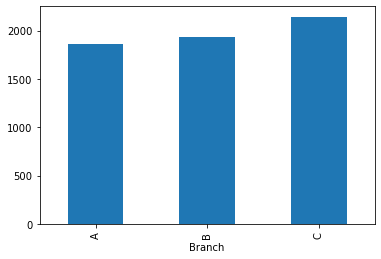

In [120]:
# which branch has the highest profit ?
data.groupby("Branch")["Profit"].mean().plot(kind = "bar")

In [168]:
data['Product code'].replace({'PD1':'Health and Beauty','PD2':'Elecctronic accessories','PD3':'Home and lifestyle','PD4':'Sports and travel','PD5':'Food and beverages','PD6':'Fashion accessories'},inplace = True)
data.head()

,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Profit
0,A,CT1,Member,Female,Health and Beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,2,3319.9705
1,C,CT3,Normal,Female,Elecctronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29,Cash,76.40,4.761905,3.8200,9.6,8,5,324.7000
2,A,CT1,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6,2059.3685
3,A,CT1,Member,Male,Health and Beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6,3446.6240
4,A,CT1,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,4,3836.4795


<AxesSubplot:ylabel='Product code'>

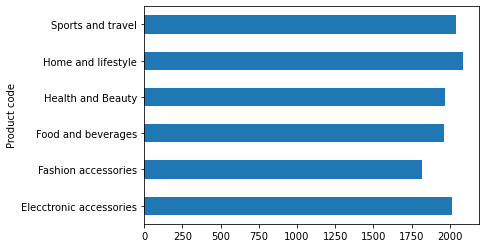

In [139]:
data.groupby("Product code")["Profit"].mean().plot(kind = "barh")

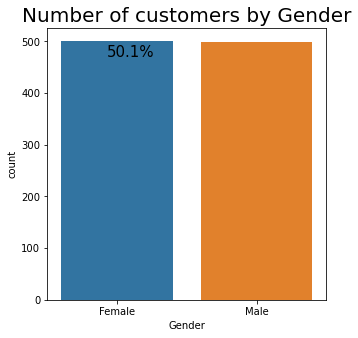

In [169]:
# is my supermarket more popular with males and females ?
plt.figure(figsize=(5,5))
countplt =sns.countplot(x="Gender",data=data)
countplt.set_title(f'Number of customers by Gender', fontsize= 20)

for p in countplt.patches:
    countplt .annotate(f'\n{round((p.get_height()/len(df))*100,2)}%',
                       (p.get_x()+0.5,p.get_height()+0.5),
                       ha='center',va="center_baseline", color="black",size=15)
    plt.show()

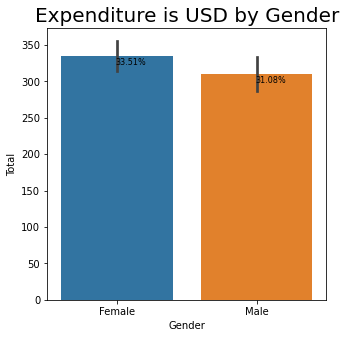

In [170]:
# who spend more money at our supermarket whether it is males and females
plt.figure(figsize=(5,5))
countplt =sns.barplot(x="Gender",y="Total",data=data)
countplt.set_title('Expenditure is USD by Gender', fontsize= 20)

for p in countplt.patches:
     countplt .annotate(f'\n{round((p.get_height()/len(df))*100,2)}%',
          (p.get_x()+0.5,p.get_height()+0.5),
                         ha='center',va="center_baseline", color="black",size=8)
plt.show()

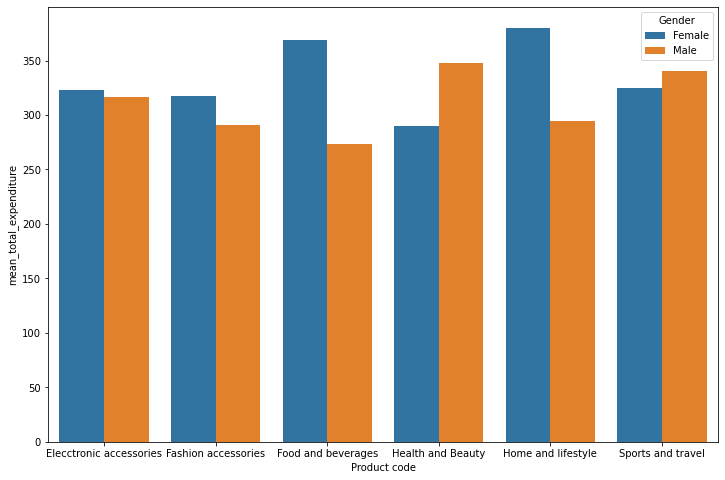

In [173]:
# who spend more money on which product line ?

t1=data.groupby(["Product code","Gender"]).agg(mean_total_expenditure=("Total","mean"))
t1=t1.reset_index()
#bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="Product code",y="mean_total_expenditure",hue="Gender",data=t1)
plt.show()

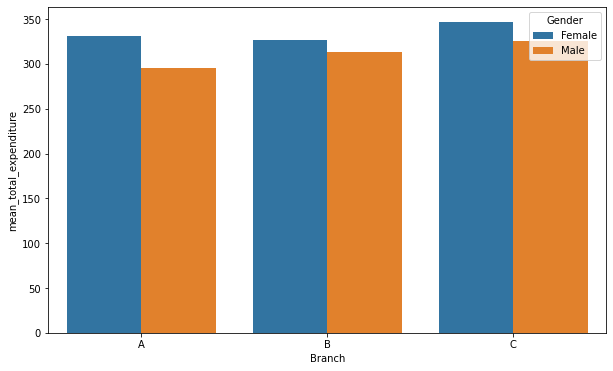

In [174]:
# who spend more money branch wise ?

t1=data.groupby(["Branch","Gender"]).agg(mean_total_expenditure=("Total","mean"))
t1=t1.reset_index()
#bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="Branch",y="mean_total_expenditure",hue="Gender",data=t1)
plt.show()

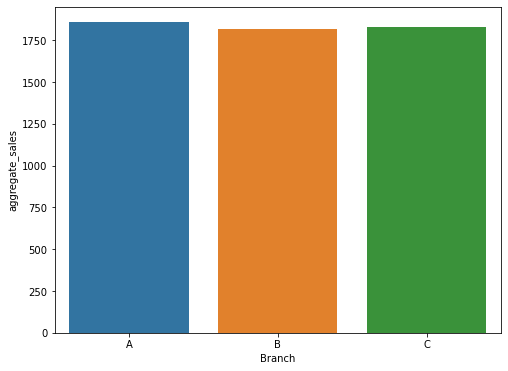

In [176]:
# about the aggregate sale across the branchess

t1=data.groupby(["Branch"]).agg(aggregate_sales=("Quantity","sum"))
t1=t1.reset_index()
#bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="Branch",y="aggregate_sales",data=t1)
plt.show()


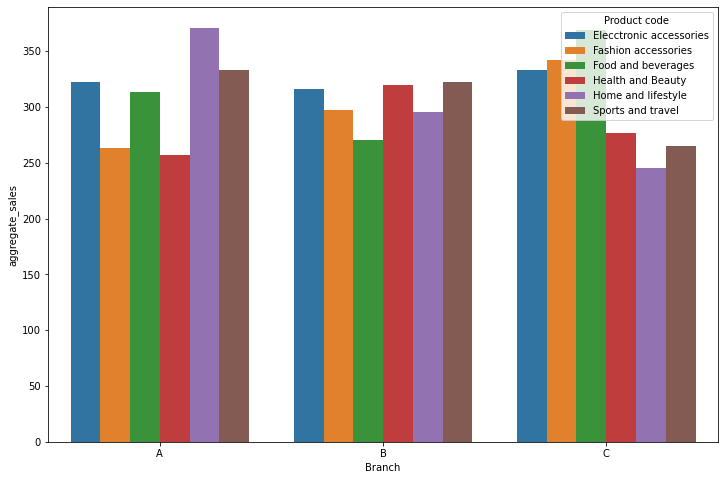

In [147]:
# number of products sold on branch wise

t1=data.groupby(["Branch","Product code"]).agg(aggregate_sales=("Quantity","sum"))
t1=t1.reset_index()
#bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.barplot(x="Branch",y="aggregate_sales",hue="Product code", data=t1)
plt.show()

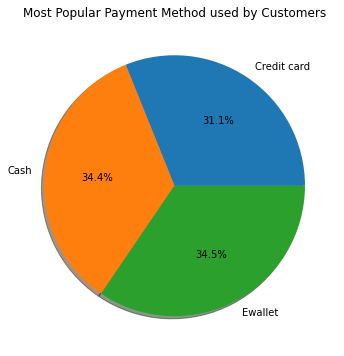

In [148]:
# most popular payment method used by customers

# pie chart
import matplotlib.pyplot as plt
payment_type = data.groupby("Payment").agg("count")
type_labels =payment_type.Branch.sort_values().index
type_counts = payment_type.Branch.sort_values()

plt.figure(figsize=(6,6))
plt.subplot(aspect=1, title='Most Popular Payment Method used by Customers')
type_branches=plt.pie(type_counts,labels=type_labels,autopct='%1.1f%%',shadow = True)
plt.show()

<AxesSubplot:xlabel='Product code', ylabel='mean_total_expenditure'>

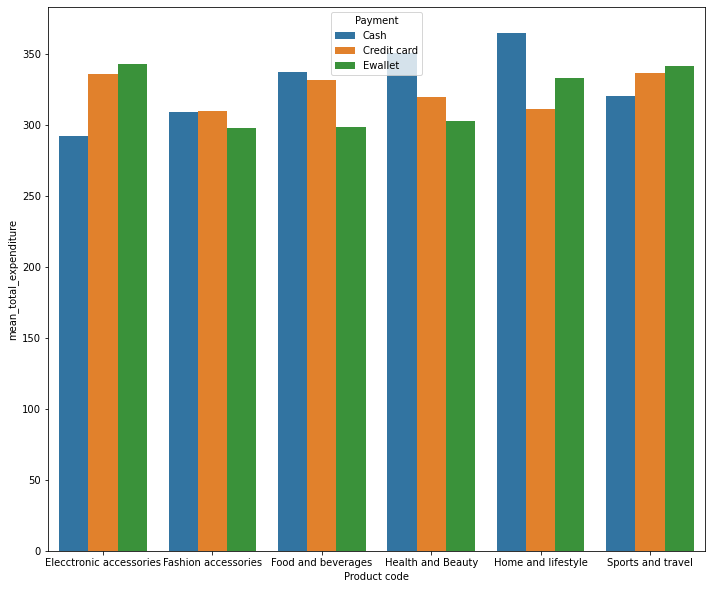

In [177]:
t1=data.groupby(["Product code","Payment"]).agg(mean_total_expenditure=("Total","mean"))
t1=t1.reset_index()
# bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.subplot(131)
sns.barplot(x="Product code",y="mean_total_expenditure",hue="Payment", data=t1)

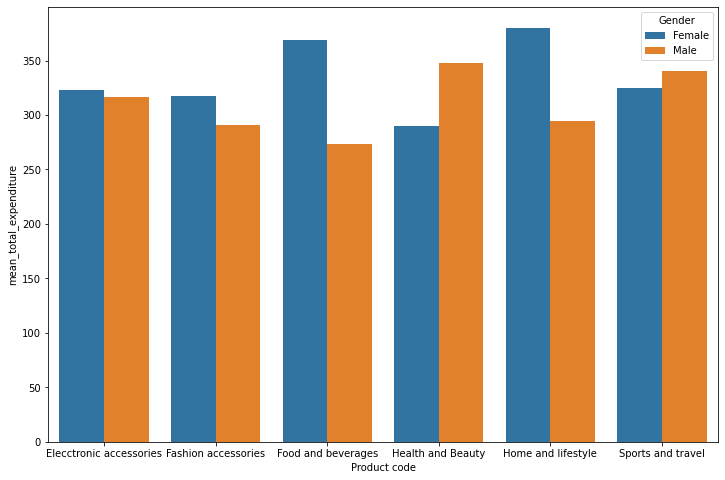

In [152]:
# what is the spending pattern of both of male and females,meaning in which cetagory do they spend more

t1=data.groupby(["Product code","Gender"]).agg(mean_total_expenditure=("Total","mean"))
t1=t1.reset_index()
#bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="Product code",y="mean_total_expenditure",hue="Gender",data=t1)
plt.show()

In [154]:
# how many product are bought by customers in product line

t1=data.groupby(["Product code"]).agg(aggregate_sales=("Quantity","sum"))
t1

,aggregate_sales
Product code,
Elecctronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and Beauty,854
Home and lifestyle,911
Sports and travel,920


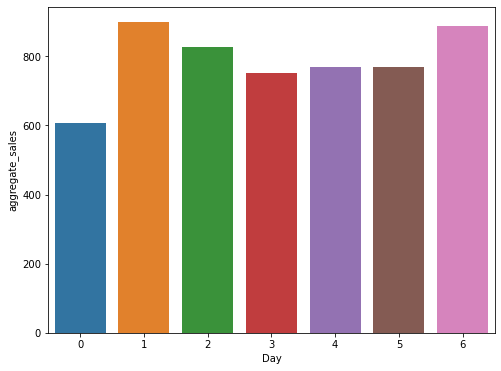

In [178]:
# which day of the week has maximum sales ?

t1=data.groupby(["Day"]).agg(aggregate_sales=("Quantity","sum"))
t1=t1.reset_index()
#bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="Day",y="aggregate_sales",data=t1)
plt.show()

In [157]:
corr= data.corr(method='spearman').round(2)

Text(0.5, 1.0, " Heatmap using Spearman's correlation")

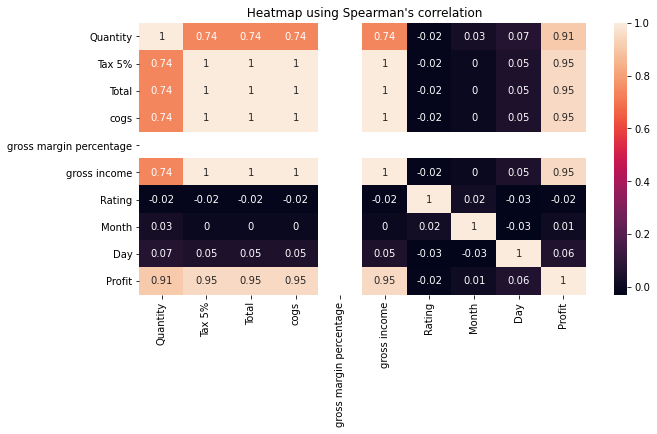

In [158]:
plt.figure(figsize = (10,5))
sns.heatmap(corr,annot =True)
plt.title(" Heatmap using Spearman's correlation")

### Inference from the Analysis
* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories are from Females
* Max Average Sales of Health & Beauty are from Males
* sundays of the weeks has maximum sales
* the gross income is highly correlate with tax,Toatal Cogs,profit.
* the product are bought by the customers are maximum in electronic and accesories.
* females have spend more money in homes and lifestyle and male have spend in health and beauty.
* E-wallet has been widely used in supermarket followed by cash and credit card
* Branch A have sold more product in home and lifestyle followed by Branch C in food and beavarages and Branch B in sports and travel.
* Branch A has the largest sale fllowed by Branch C and Branch B
* females spend more money in our supermarket than males
* Home and lifestyle have made the biggest profit followed by Electronic and accesories then sports and travel
* Branch C has the highest Profit